In [1]:
!pip install --quiet nltk
!pip install --quiet bs4
!pip install --quiet tqdm
!pip install --quiet scipy scikit-learn keras-tuner
!pip install --quiet keras-tuner

In [2]:
import pandas as pd
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from tqdm import tqdm

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...


True

## Loading in the data and preprocessing

In [ ]:
# Define the file paths
file_paths = [
    'C:/Users/Mads/Documents/NLP/cnn_dailymail/3.0.0/train-00000-of-00003.parquet',
    'C:/Users/Mads/Documents/NLP/cnn_dailymail/3.0.0/train-00001-of-00003.parquet',
    'C:/Users/Mads/Documents/NLP/cnn_dailymail/3.0.0/train-00002-of-00003.parquet',
]

# Load and concatenate the Parquet files
train_df_list = [pd.read_parquet(file) for file in file_paths]
train_df = pd.concat(train_df_list, ignore_index=True)

# Randomly sample 150,000 rows
sampled_df = train_df.sample(n=1000, random_state=1)

# Display the shape and the first few rows of the sampled DataFrame
print(sampled_df.shape)
print(sampled_df.head())


In [ ]:
sampled_df.to_csv('sampled_df.csv', index=False)

In [ ]:
lemmatizer = WordNetLemmatizer()

file_path = 'data.csv'
df = pd.read_csv(file_path)

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    
    return cleaned_text

# Apply the cleaning function with progress bars
tqdm.pandas()

In [ ]:
# Apply the cleaning function to both the 'article' and 'highlights' columns
df['cleaned_article'] = df['article'].progress_apply(clean_text)

In [ ]:
df['cleaned_highlights'] = df['highlights'].progress_apply(clean_text)

In [ ]:
cleaned_file_path = 'cleaned_data.csv'

In [ ]:
df.to_csv(cleaned_file_path, index=False)

## Loading in our preprocessed df

ubuntu commands required to load in the file uploaded to github using the large file system.
sudo apt-get update
sudo apt-get install git-lfs
git lfs install
git lfs pull


In [5]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,id,cleaned_article,cleaned_highlights
0,1211a23db42e7dd52a43e564a899ebbf1b2d1251,daily mail reporter published est june updated...,president barack obamas top national security ...
1,aff92aa2fc6e294efeeed70e9b0a0aefac32b030,lizzie parry mailonline young cancer victim to...,sophie walton diagnosed bone cancer discoverin...
2,bb7757b7bf3d90ec4f1d1915a4699eecafc25d1a,rebel aided al qaedalinked militant seized con...,israeli military closed area around crossing o...
3,8f25b2c54cb563b98e1f2619401df7137a3f0c77,cnn two right group launched stinging critique...,new trial resume kremlin critic aleksei navaln...
4,daa6ca8fe860fa70bed00e2bfd05ab7414b7cb0e,cnn puffing electronic cigarette already nono ...,government proposes explicitly ban use electro...


In [8]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
  Using cached grpcio-1.64.0-cp310-cp310-manylinux_

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# Tokenizer
tokenizer_article = Tokenizer(num_words = 10000, oov_token='<OOV>')
tokenizer_article.fit_on_texts(df.cleaned_article)

tokenizer_summary = Tokenizer(num_words = 10000, oov_token='<OOV>')
tokenizer_summary.fit_on_texts(df.cleaned_highlights)

tokenized_article = tokenizer_article.texts_to_sequences(df.cleaned_article)
tokenized_summary = tokenizer_summary.texts_to_sequences(df.cleaned_highlights)

### Potential outlier detection

In [11]:
max_article_len = max(len(sequence) for sequence in tokenized_article)
max_summary_len = max(len(sequence) for sequence in tokenized_summary)

print(max_article_len, max_summary_len)

1828 717


/tmp/ipykernel_242/844912644.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Article Length', data=lengths_df, palette='Set2')
/tmp/ipykernel_242/844912644.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Summary Length', data=lengths_df, palette='Set2')


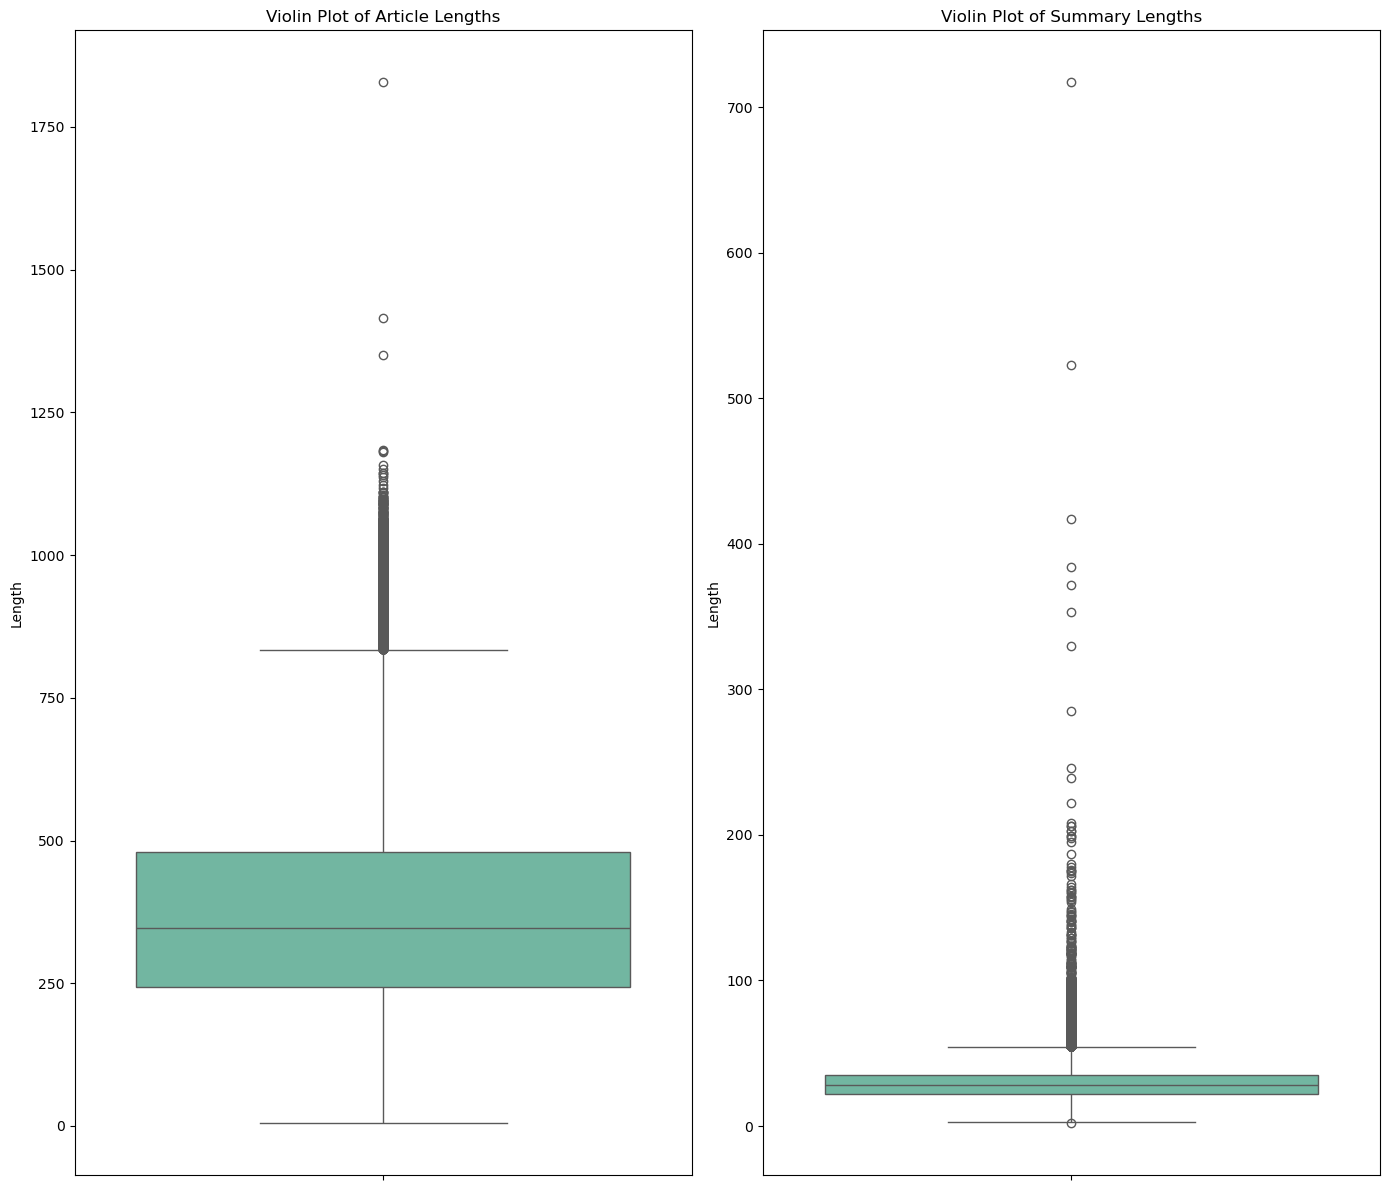

In [12]:
import matplotlib.pyplot as plt
!pip install --quiet seaborn
import seaborn as sns

article_lengths = [len(sequence) for sequence in tokenized_article]
summary_lengths = [len(sequence) for sequence in tokenized_summary]

# Create a DataFrame for plotting
lengths_df = pd.DataFrame({
    'Article Length': article_lengths,
    'Summary Length': summary_lengths
})

# Melt the DataFrame to a long format
lengths_df_melted = lengths_df.melt(var_name='Type', value_name='Length')

# Plot violin plots using Seaborn
plt.figure(figsize=(14, 12))

# Violin plot for Article Lengths
plt.subplot(1, 2, 1)
sns.boxplot(y='Article Length', data=lengths_df, palette='Set2')
plt.title('Violin Plot of Article Lengths')
plt.xlabel('')
plt.ylabel('Length')

# Violin plot for Summary Lengths
plt.subplot(1, 2, 2)
sns.boxplot(y='Summary Length', data=lengths_df, palette='Set2')
plt.title('Violin Plot of Summary Lengths')
plt.xlabel('')
plt.ylabel('Length')

plt.tight_layout()
plt.show()

In [13]:
#removing outliers:
# Identify indices of summaries longer than 150 tokens
indices_to_remove = [i for i, length in enumerate(summary_lengths) if length > 150]
print("Instances remove: ", len(indices_to_remove))

# Remove the corresponding articles and summaries
filtered_articles = [article for i, article in enumerate(tokenized_article) if i not in indices_to_remove]
filtered_summaries = [summary for i, summary in enumerate(tokenized_summary) if i not in indices_to_remove]


Instances remove:  40


In [14]:
article_lengths = [len(sequence) for sequence in filtered_articles]
summary_lengths = [len(sequence) for sequence in filtered_summaries]
#indetify indices of articles longer than 1200 tokens
indices_to_remove = [i for i, length in enumerate(article_lengths) if length > 1100]
print("Instances removed: ", len(indices_to_remove))

# remove the corresponding articles and summaries
filtered_articles = [article for i, article in enumerate(filtered_articles) if i not in indices_to_remove]
filtered_summaries = [summary for i, summary in enumerate(filtered_summaries) if i not in indices_to_remove]

Instances removed:  24


In [15]:
print(len(filtered_articles), len(filtered_summaries))

149936 149936


## Padding to ensure that our text-sequences are of the same length

1099 149


/tmp/ipykernel_242/3070405093.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Article Length', data=new_lengths_df, palette='Set2')
/tmp/ipykernel_242/3070405093.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Summary Length', data=new_lengths_df, palette='Set2')


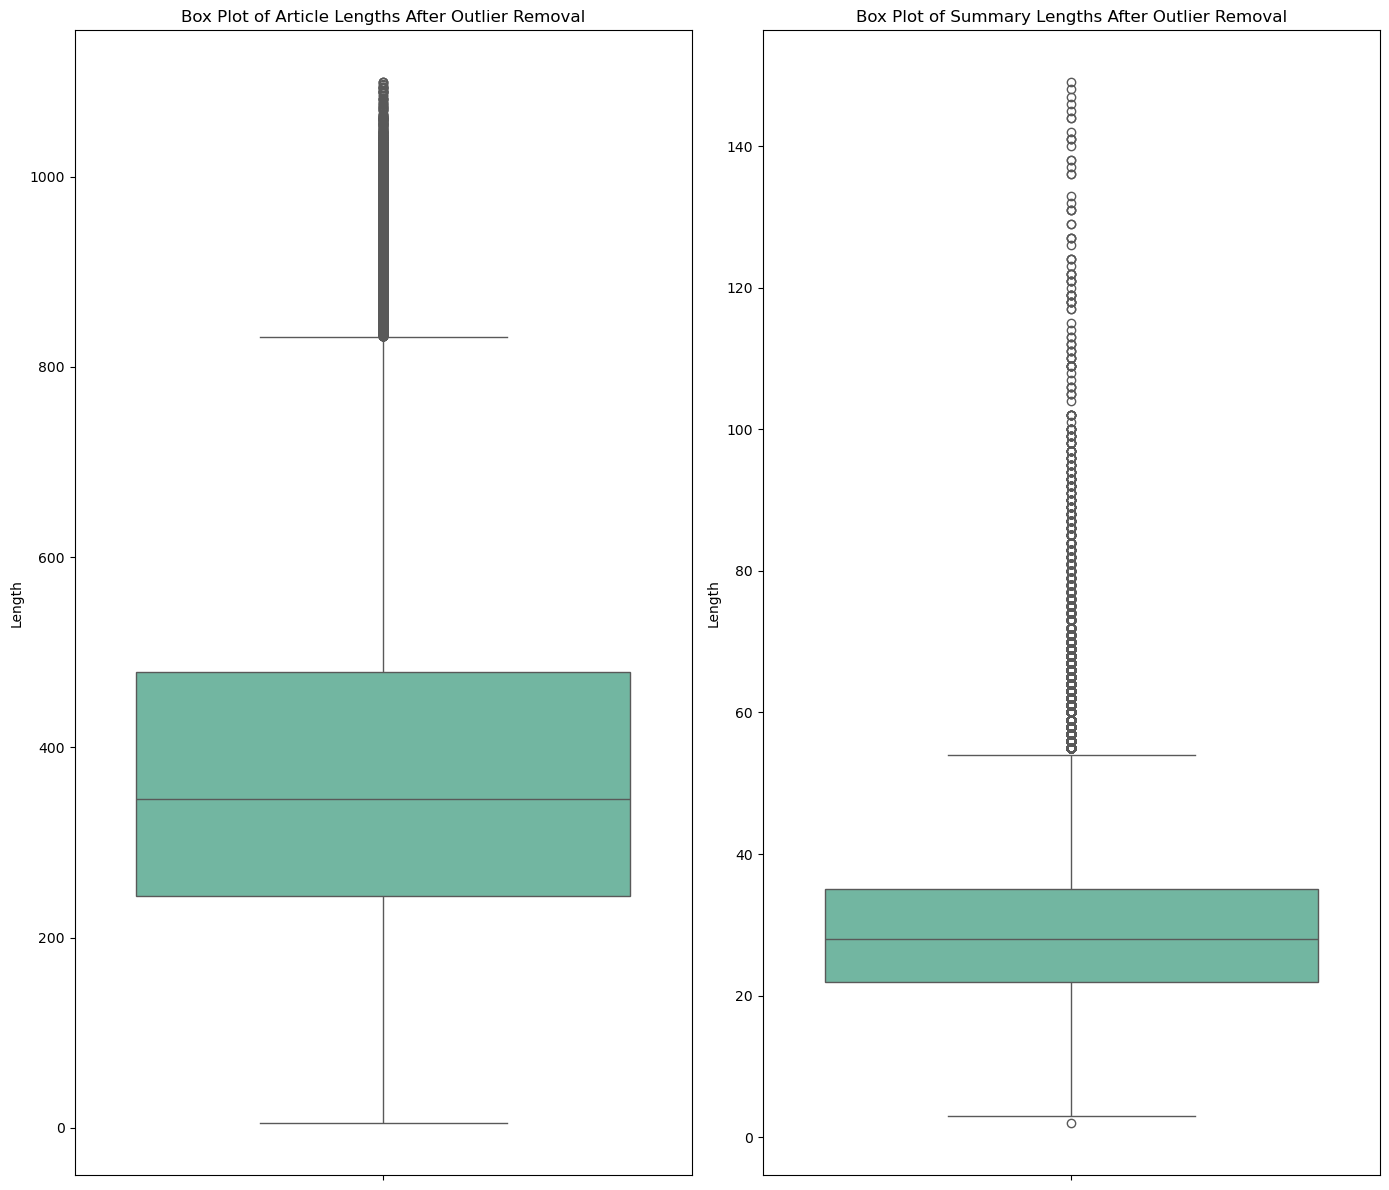

In [16]:
max_article_len = max(len(sequence) for sequence in filtered_articles)
max_summary_len = max(len(sequence) for sequence in filtered_summaries)

print(max_article_len, max_summary_len)

# Plot new distributions
new_article_lengths = [len(sequence) for sequence in filtered_articles]
new_summary_lengths = [len(sequence) for sequence in filtered_summaries]

# Create a new DataFrame for plotting
new_lengths_df = pd.DataFrame({
    'Article Length': new_article_lengths,
    'Summary Length': new_summary_lengths
})

# Plot new box plots
plt.figure(figsize=(14, 12))

# Box plot for new Article Lengths
plt.subplot(1, 2, 1)
sns.boxplot(y='Article Length', data=new_lengths_df, palette='Set2')
plt.title('Box Plot of Article Lengths After Outlier Removal')
plt.xlabel('')
plt.ylabel('Length')

# Box plot for new Summary Lengths
plt.subplot(1, 2, 2)
sns.boxplot(y='Summary Length', data=new_lengths_df, palette='Set2')
plt.title('Box Plot of Summary Lengths After Outlier Removal')
plt.xlabel('')
plt.ylabel('Length')

plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_article_sequences = pad_sequences(filtered_articles, max_article_len, padding='post', truncating='post')
padded_summary_sequences = pad_sequences(filtered_summaries, max_summary_len, padding = 'post', truncating = 'post')

## Building our network

In [18]:
!pip install --quiet keras-tuner

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    lstm_units = hp.Int('lstm_units', min_value=50, max_value=200, step=50)
    embedding_dim = hp.Int('embedding_dim', min_value=100, max_value=250, step=50)
    
    # Encoder
    encoder_inputs = Input(shape=(max_article_len,))
    encoder_embedding = Embedding(input_dim=10000, output_dim=embedding_dim)(encoder_inputs)
    encoder_lstm = LSTM(units=lstm_units, return_state=True, dropout=hp.Float('encoder_dropout', 0.0, 0.3, step=0.1))
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(max_summary_len,))
    decoder_embedding = Embedding(input_dim=10000, output_dim=embedding_dim)(decoder_inputs)
    decoder_lstm = LSTM(units=lstm_units, return_sequences=True, return_state=True, dropout=hp.Float('decoder_dropout', 0, 0.3, step=0.1))
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
    decoder_dense = Dense(10000, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    
    # Compile the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [26]:
# Create decoder input sequences by right-shifting the padded summary sequences
import numpy as np
!pip install --quiet scikit-learn
from sklearn.model_selection import train_test_split
# Create decoder input sequences by right-shifting the padded summary sequences
decoder_input_sequences = np.zeros_like(padded_summary_sequences)
decoder_input_sequences[:, 1:] = padded_summary_sequences[:, :-1]
decoder_input_sequences[:, 0] = 0  # Use padding token (0) as the start token

labels = padded_summary_sequences

# Combine encoder inputs, decoder inputs, and labels for consistent splitting
data_combined = list(zip(padded_article_sequences, decoder_input_sequences))
labels_combined = labels

# Split the data
X_train_combined, X_val_combined, y_train, y_val = train_test_split(data_combined, labels_combined, test_size=0.2, random_state=42)

# Separate encoder and decoder inputs after splitting
X_train_encoder, X_train_decoder = zip(*X_train_combined)
X_val_encoder, X_val_decoder = zip(*X_val_combined)

# Convert tuples back to numpy arrays
X_train_encoder = np.array(X_train_encoder)
X_train_decoder = np.array(X_train_decoder)
X_val_encoder = np.array(X_val_encoder)
X_val_decoder = np.array(X_val_decoder)


In [27]:

from tensorflow.keras.callbacks import TensorBoard
import datetime
import keras_tuner as kt
# Define the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Increase trials to explore more combinations
    executions_per_trial=1,
    directory='my_dir2',
    project_name='article_summary_tuning'
)

# Setup TensorBoard
log_dir = "logs2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Run the tuner
tuner.search([X_train_encoder, X_train_decoder], y_train, epochs=5, validation_data=([X_val_encoder, X_val_decoder], y_val), callbacks=[tensorboard_callback], batch_size = 512)




Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
200               |200               |lstm_units
250               |250               |embedding_dim
0                 |0                 |encoder_dropout
0                 |0                 |decoder_dropout

Epoch 1/5
 18/235 ━━━━━━━━━━━━━━━━━━━━ 32:52 9s/step - accuracy: 0.6461 - loss: 7.6329

KeyboardInterrupt: 

In [ ]:

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Setup TensorBoard for the final model training
log_dir = "logs2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_final"
tensorboard_callback_final = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with the optimal hyperparameters
history = model.fit([X_train_encoder, X_train_decoder], y_train, epochs=10, validation_data=([X_val_encoder, X_val_decoder], y_val), callbacks=[tensorboard_callback_final])

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Fixed hyperparameters
lstm_units = 150  # Example value, you can adjust this
embedding_dim = 250  # Example value, you can adjust this
dropout_rate = 0.2  # Example value, you can adjust this

# Build the model
def build_model():
    # Encoder
    encoder_inputs = Input(shape=(max_article_len,))
    encoder_embedding = Embedding(input_dim=10000, output_dim=embedding_dim)(encoder_inputs)
    encoder_lstm = LSTM(units=lstm_units, return_state=True, dropout=dropout_rate)
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(max_summary_len,))
    decoder_embedding = Embedding(input_dim=10000, output_dim=embedding_dim)(decoder_inputs)
    decoder_lstm = LSTM(units=lstm_units, return_sequences=True, return_state=True, dropout=dropout_rate)
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
    decoder_dense = Dense(10000, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    
    # Compile the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
model = build_model()

# Train the model
history = model.fit(
    [X_train_encoder, X_train_decoder], y_train,
    epochs=10,
    validation_data=([X_val_encoder, X_val_decoder], y_val),
    batch_size=512
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1961s 8s/step - accuracy: 0.7825 - loss: 3.3412 - val_accuracy: 0.8164 - val_loss: 1.5511
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1933s 8s/step - accuracy: 0.8167 - loss: 1.5472 - val_accuracy: 0.8169 - val_loss: 1.5369
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1932s 8s/step - accuracy: 0.8173 - loss: 1.5216 - val_accuracy: 0.8179 - val_loss: 1.4873
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1968s 8s/step - accuracy: 0.8182 - loss: 1.4746 - val_accuracy: 0.8188 - val_loss: 1.4507
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1955s 8s/step - accuracy: 0.8196 - loss: 1.4343 - val_accuracy: 0.8195 - val_loss: 1.4191
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1951s 8s/step - accuracy: 0.8200 - loss: 1.4062 - val_accuracy: 0.8202 - val_loss: 1.3959
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1950s 8s/step - accuracy: 0.8208 - loss: 1.3808 - val_accuracy: 0.8209 - val_loss: 1.3776
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1948s 8s/step - accuracy: 0.8214 - loss: 1.3625 - 

In [30]:
model.save('model.keras')

## Baseline models

In [24]:
!pip install --quiet transformers
!pip install --quiet datasets
!pip install --quiet transformers datasets rouge-score

In [26]:
# Load your data into a DataFrame
df = pd.read_csv('cleaned_data.csv')

# Split the data into train (80%), validation (10%), and test (10%) sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Convert DataFrames to Hugging Face Datasets
dataset = DatasetDict({
    'train': Dataset.from_pandas(train_df),
    'validation': Dataset.from_pandas(validation_df),
    'test': Dataset.from_pandas(test_df)
})

# Tokenize the data
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

def preprocess_function(examples):
    inputs = [doc for doc in examples['cleaned_article']]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['cleaned_highlights'], max_length=150, truncation=True)

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

tokenized_dataset = dataset.map(preprocess_function, batched=True)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

In [33]:
# Install PyTorch
#!pip install --quiet torch
!pip install keras==2.7.0


from transformers import TFBartForConditionalGeneration, TFTrainer, TFTrainingArguments

# Load the TensorFlow BART model
model = TFBartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Define training arguments
training_args = TFTrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=3,
)

# Initialize the Trainer
trainer = TFTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
)

# Train the model
trainer.train()


RuntimeError: Failed to import transformers.models.bart.modeling_tf_bart because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

## Bart

In [31]:
# Block 1: Install Required Libraries
!pip install --quiet --upgrade transformers sentencepiece datasets torch accelerate

# Block 2: Import Libraries
import pandas as pd
from transformers import BartTokenizer, BartForConditionalGeneration, pipeline
from datasets import load_metric

# Block 3: Load DataFrame
# Assuming df is already loaded and contains the columns 'cleaned_article' and 'cleaned_highlights'
df.head()

,id,cleaned_article,cleaned_highlights
0,1211a23db42e7dd52a43e564a899ebbf1b2d1251,daily mail reporter published est june updated...,president barack obamas top national security ...
1,aff92aa2fc6e294efeeed70e9b0a0aefac32b030,lizzie parry mailonline young cancer victim to...,sophie walton diagnosed bone cancer discoverin...
2,bb7757b7bf3d90ec4f1d1915a4699eecafc25d1a,rebel aided al qaedalinked militant seized con...,israeli military closed area around crossing o...
3,8f25b2c54cb563b98e1f2619401df7137a3f0c77,cnn two right group launched stinging critique...,new trial resume kremlin critic aleksei navaln...
4,daa6ca8fe860fa70bed00e2bfd05ab7414b7cb0e,cnn puffing electronic cigarette already nono ...,government proposes explicitly ban use electro...


In [33]:
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.9 MB/s eta 0:00:0000:01


In [34]:
# Block 4: Initialize Pipeline
# Initialize the BART summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer="facebook/bart-large-cnn")

# Block 5: Cap Articles and Generate Summaries
# Cap articles to a maximum of 1000 tokens
def cap_article_length(text, tokenizer, max_length=1000):
    tokens = tokenizer.tokenize(text)
    if len(tokens) > max_length:
        tokens = tokens[:max_length]
    return tokenizer.convert_tokens_to_string(tokens)

# Cap the articles
df['capped_article'] = df['cleaned_article'].apply(lambda x: cap_article_length(x, summarizer.tokenizer))

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
!pip install --quiet evaluate

from tqdm import tqdm  # Import tqdm for progress bar
import pandas as pd  # Assuming pandas is already imported

# Generate summaries
def generate_summary(text, summarizer):
    input_length = len(summarizer.tokenizer.tokenize(text))
    max_length = input_length  # Set a reasonable max_length for summary
    return summarizer(text, max_length=max_length, min_length=30, do_sample=False)[0]['summary_text']

# Process only the first 1000 articles
df_subset = df.sample(n=15000, random_state=42).copy()

# Add progress bar
tqdm.pandas()  # Initialize tqdm with pandas

df_subset['generated_summary'] = df_subset['capped_article'].progress_apply(lambda x: generate_summary(x, summarizer))

# Block 6: Evaluate Summaries
# Load the ROUGE metric
rouge = evaluate.load("rouge", trust_remote_code=True)

# Prepare the predictions and references
predictions = df_subset['generated_summary'].tolist()
references = df_subset['cleaned_highlights'].tolist()

# Compute ROUGE scores
results = rouge.compute(predictions=predictions, references=references)

# Display results
results

 11%|█▏        | 1696/15000 [1:24:15<13:15:09,  3.59s/it]